# Image Classification

# Aim

 Perform Image classification analysis using CNN architecture for the given dataset
 
     Note:- Dataset taken from "https://data.mendeley.com/datasets/4drtyfjtfy/1"

# Process Info()......

1.Importing libraries...


2.ImageDataGenerating....Cloud,Shine,Rain,Sunrise


3.Appending All images into a datasets....
    =>Converted all Datsets from int to Float 
    
    
4.Assigned Labeling for Recognization.


5.Applying CNN Archiecture
    =>Input Layer
    =>Taken 3 Conv2d layers(3,3) 
    =>Dense Layers(512)
    =>Flattend the layers
    =>Output Layer
    
    
 6.Imported the Categorical,Train_test_split
 
 
 7.Compiled and fitted tha data 
 
 
 8.Evaluvated the test and train score
 
 
 
 9.Prdicted the Image.....
    
    

In [1]:
#importing Libraries......
import tensorflow as tf
from  tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np
import pandas as pd
import cv2
from skimage import io
import os
import matplotlib.pyplot as plt

In [2]:
address="D:\\WeatherRecognisation\\" #saving file Location into Address Variable

In [3]:
cloud=os.listdir(address+"Cloudy")#Saving all cloud Images into Cloud Variable

In [4]:
len(cloud)

300

# Image Data Generator.....

=>ImageDataGenerator class ensures that the model receives new variations of the images at each epoch. But it only returns the transformed images and does not add it to the original  images.

In [5]:
img_gen=ImageDataGenerator(rotation_range=45,width_shift_range=0.20,height_shift_range=0.20,shear_range=0.20,zoom_range=0.20,fill_mode='constant',
    cval=125,
    horizontal_flip=True,
    vertical_flip=True) #Assigning Requirements and ranges for Images

# Generating Cloud Images by using Image data Generator

In [6]:
datacloud=[] #To append Cloud Images created a Dataset

In [7]:
#Resizing and reading and appending all cloud images into DataCloud
for i,imagecloud in enumerate(cloud):
    if imagecloud.split(".")[1]=="jpg":#Taking only jpg Files
        image=plt.imread(address+"cloudy\\"+imagecloud)#Reading cloud Images 
        image=cv2.resize(image,(128,128))#resizing the images using Computer Vision
        if image.shape==(128,128,3):
            datacloud.append(np.array(image))

In [11]:
a_datacloud=np.array(datacloud)#converting the dtype=uint8 to Float32

In [12]:
a_datacloud.shape

(298, 128, 128, 3)

In [13]:
#Generating each image into 50 times without effecting the Orginal Images
#Saving genrated images into jpg Files........Save_format="jpg"
#saving the generated images with  Aug name...Save_prefix="Aug"

c=0
for image_batch in img_gen.flow(a_datacloud,batch_size=50,save_to_dir=address+"cloudy", save_prefix='Aug',save_format='jpg'):
    c=c+1
    if c>=50:
        break
        

# Generating Rain Images by using Image data Generator

In [15]:
rain=os.listdir(address+"Rain")

In [16]:
datarain1=[] #To append Rain Images created a Dataset

In [17]:
#Resizing and reading and appending all cloud images into Datarain
for j,imagerain in enumerate(rain):
    if imagecloud.split(".")[1]=="jpg":#Taking only jpg Files
        image=plt.imread(address+"Rain\\"+imagerain)#Reading rainImages
        image=cv2.resize(image,(128,128))#resizing the images using Computer Vision
        if image.shape == (128,128,3):
            datarain1.append(np.array(image))

In [23]:
a_datarain=np.array(datarain1)#converting the dtype=uint8 to Float32

In [24]:
a_datarain.shape

(212, 128, 128, 3)

In [25]:
len(rain)

215

In [26]:
#Generating each image into 50 times without effecting the Orginal Images
#Saving genrated images into jpg Files........Save_format="jpg"
#saving the generated images with  Aug name...Save_prefix="Aug"

c=0
for image_batch in img_gen.flow(a_datarain,batch_size=50,save_to_dir=address+"Rain", save_prefix='Aug',save_format='jpg'):
    c=c+1
    if c>=50:
        break

# Generating sunrise Images by using Image data Generator

In [27]:
sunrise=os.listdir(address+"SunRise")

In [28]:
datasunrise=[] #To append sunrise Images created a Dataset

In [29]:
#Resizing and reading and appending all cloud images into Datasunrise
for k,imagesunrise in enumerate(sunrise):
    if imagesunrise.split(".")[1]=="jpg":
        image=plt.imread(address+"SunRise\\"+imagesunrise)#Reading sunrise Images
        image=cv2.resize(image,(128,128))#resizing the images using Computer Vision
        if image.shape == (128,128,3):
            datasunrise.append(np.array(image))

In [30]:
a_datasunise=np.array(datasunrise)#converting the dtype=uint8 to Float32

In [36]:
a_datasunise.shape

(356, 128, 128, 3)

In [37]:
c=0
for image_batch in img_gen.flow(a_datasunise,batch_size=50,save_to_dir=address+"SunRise", save_prefix='Aug',save_format='jpg'):
    c=c+1
    if c>=50:
        break

# Generating Shine Images by using Image data Generato

In [38]:
shine=os.listdir(address+"Shine")

In [39]:
datashine=[]#dataset

In [44]:
#Resizing and reading and appending all cloud images into Datashine
for l,imageshine in enumerate(shine):
    if imageshine.split(".")[1]=="jpg":#Taking only jpg Files
        image=plt.imread(address+"Shine\\"+imageshine)#Reading sunrise Images
        image=cv2.resize(image,(128,128))#resizing the images using Computer Vision
        if image.shape == (128,128,3):
            datashine.append(np.array(image))

In [45]:
a_datashine=np.array(datashine)

In [46]:
a_datashine.shape

(251, 128, 128, 3)

In [47]:
c=0
for image_batch in img_gen.flow(a_datashine,batch_size=50,save_to_dir=address+"Shine", save_prefix='Aug',save_format='jpg'):
    c=c+1
    if c>=50:
        break

# CNN(Convolutional Neural Network):........
=>Convolutional Neural Network or CNN is a type of artificial neural network, which is widely used for image/object recognition and classification

=>> CNN takes an image as an input, processes it, and classifies it under certain categories.

# Cloud Images

In [52]:
cloud=os.listdir(address+"Cloudy")#Saving all cloud Images into Cloud Variable

In [51]:
len(cloud)

2783

In [53]:
totaldata1=[]
label=[]
size=128

In [54]:
for x1,imagecloud in enumerate(cloud):
    if imagecloud.split(".")[1]=="jpg":
        image =plt.imread(address+"cloudy\\"+imagecloud)
        if image.shape==(128,128,3):
            totaldata1.append(np.array(image))#appending cloud images to totaldata1
            label.append(1)#Assigning label-1 to all cloud Images

In [60]:
len(totaldata1)#length Of Totaldata set

2483

# Rain Images

In [61]:
rain=os.listdir(address+"Rain")#Saving all Rain  Images into rain Variable

In [62]:
for x1,imagerain in enumerate(rain):
    if imagerain.split(".")[1]=="jpg":
        image =plt.imread(address+"Rain\\"+imagerain)
        if image.shape==(128,128,3):
            totaldata1.append(np.array(image))
            label.append(2)#Assigning label-2 to rain Imgaes

In [63]:
len(totaldata1)

4601

# Shine Images 

In [64]:
shine=os.listdir(address+"Shine")#Saving all Shine Images into Shine Variable

In [65]:
for x1,imageshine in enumerate(shine):
    if imageshine.split(".")[1]=="jpg":
        image =plt.imread(address+"Shine\\"+imageshine)
        if image.shape==(128,128,3):
            totaldata1.append(np.array(image))
            label.append(3)#Assigning label-3 to Shine Imgaes

In [66]:
len(totaldata1)

6708

# SunRise Images

In [69]:
sunrise=os.listdir(address+"SunRise")

In [70]:
len(sunrise)

2593

In [71]:
for x1,imagesunrise in enumerate(sunrise):
    if imagesunrise.split(".")[1]=="jpg":
        image =plt.imread(address+"SunRise\\"+imagesunrise)
        
        if image.shape==(128,128,3):
            totaldata1.append(np.array(image))
            label.append(4)#Assigning Label-4 to Sunrise Images 

In [72]:
len(totaldata1)

8944

# importing Model and Layers

In [74]:
from tensorflow.keras import layers

In [75]:
from tensorflow.keras.models import Model

# Input Layer


In [76]:
input_1=layers.Input(shape=(size,size,3))

# First Convo2D Layer

In [77]:
con1=layers.Conv2D(32,kernel_size=(3,3),activation="relu",padding="same")(input_1)# Rectified Linear Unit, ƒ(x) = max(0,x).
max1=layers.MaxPool2D((2,2))(con1)#Reduce the dimention
nor1=layers.BatchNormalization(axis=-1)(max1)
drop1=layers.Dropout(0.20)(nor1)

# Second Convo2D Layer

In [78]:
con2=layers.Conv2D(32,kernel_size=(3,3),activation="relu",padding="same")(nor1)
max2=layers.MaxPool2D((2,2))(con2)#also called as subsampling or dow sampling
nor2=layers.BatchNormalization(axis=-1)(max2)
drop2=layers.Dropout(0.20)(nor2)

# Third Convo2D Layer

In [79]:
con3=layers.Conv2D(32,kernel_size=(3,3),activation="relu",padding="same")(nor2)
max3=layers.MaxPool2D((2,2))(con3)
nor3=layers.BatchNormalization(axis=-1)(max3)
drop3=layers.Dropout(0.20)(nor3)

#     Flatten

In [80]:
flat=layers.Flatten()(drop3)

# First Dense Layer

In [81]:
hid1=layers.Dense(512,activation="relu")(flat)
nor4=layers.BatchNormalization(axis=-1)(hid1)
drop4=layers.Dropout(0.20)(nor4)

# Second Dense Layer

In [82]:
hid2=layers.Dense(256,activation="relu")(nor4)
nor5=layers.BatchNormalization(axis=-1)(hid2)
drop5=layers.Dropout(0.20)(nor5)

# Third Dense Layer

In [83]:
hid3=layers.Dense(128,activation="relu")(nor5)
nor6=layers.BatchNormalization(axis=-1)(hid3)
drop6=layers.Dropout(0.20)(nor6)

# Output Layer

In [84]:
#Taken only 5 denselayers coz index starts from 0
output=layers.Dense(5,activation="sigmoid")(drop6)#Sigmoid/softmax classify the Images
mod=Model(inputs=input_1,outputs=output)
mod.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128   

# Importing Categorical

In [85]:
from tensorflow.keras.utils import to_categorical

In [86]:
np.array(label)

array([1, 1, 1, ..., 4, 4, 4])

In [87]:
label_cat=to_categorical(np.array(label))#Converted labels into categorical label

In [88]:
label_cat


array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

# Train_Test_Split

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
Xtrain,xtest,Ytrain,ytest=train_test_split(totaldata1,label_cat,test_size=0.20)

# Compiling

In [91]:
mod.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

# Fitting

In [92]:
mod.fit(np.array(Xtrain),Ytrain,epochs=10,batch_size=64,verbose=1,shuffle=False,validation_split=0.1)

Epoch 1/10
101/101 [==============================] - 521s 5s/step - loss: 0.5258 - accuracy: 0.8236 - val_loss: 1.4837 - val_accuracy: 0.5908
Epoch 2/10
101/101 [==============================] - 537s 5s/step - loss: 0.2222 - accuracy: 0.9214 - val_loss: 0.7126 - val_accuracy: 0.7765
Epoch 3/10
101/101 [==============================] - 1634s 16s/step - loss: 0.1338 - accuracy: 0.9489 - val_loss: 0.3685 - val_accuracy: 0.8911
Epoch 4/10
101/101 [==============================] - 165s 2s/step - loss: 0.1108 - accuracy: 0.9585 - val_loss: 0.6806 - val_accuracy: 0.8534
Epoch 5/10
101/101 [==============================] - 167s 2s/step - loss: 0.0704 - accuracy: 0.9772 - val_loss: 0.6062 - val_accuracy: 0.8422
Epoch 6/10
101/101 [==============================] - 173s 2s/step - loss: 0.0419 - accuracy: 0.9856 - val_loss: 3.1683 - val_accuracy: 0.6215
Epoch 7/10
101/101 [==============================] - 173s 2s/step - loss: 0.0461 - accuracy: 0.9852 - val_loss: 6.2208 - val_accuracy: 0.50

In [94]:
mod.evaluate(np.array(xtest),ytest)

56/56 [==============================] - 15s 260ms/step - loss: 1.7210 - accuracy: 0.7311


[1.7209504842758179, 0.7311347126960754]

# Image Prediction

# Predicting the sunrise Image

In [102]:
sunrise1=cv2.imread("C:\\Users\\prata\\Desktop\\at_sunrise_515562.jpg")

In [103]:
sunrise1.shape

(400, 600, 3)

In [104]:
img_sunrise=cv2.resize(sunrise1,(128,128))#Resizing the image

In [106]:
img_sunrise=np.array(sunrise1)

In [107]:
img_sunrise=np.array(img_sunrise,dtype="float")/255.0#converting into float

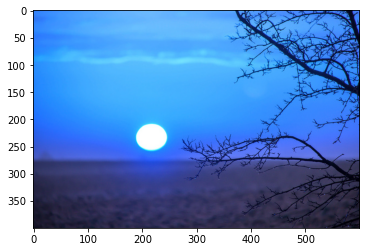

In [108]:
plt.imshow(img_sunrise)

In [ ]:
img_sunrise=img_sunrise.reshape(1,128,128,3)#Reshaping

In [ ]:
img_sunrise.shape

In [ ]:
np.argmax(mod.predict(img_sunrise))#predicting the image

# Predicting the Rain Image

In [109]:
Rain1=cv2.imread("C:\\Users\\prata\\Desktop\\surface-455124__480.jpg")

In [110]:
Rain1.shape

(480, 826, 3)

In [111]:
img_rain=cv2.resize(Rain1,(128,128))

In [112]:
img_rain=np.array(img_rain)

In [113]:
img_rain=np.array(img_rain,dtype="float")/255.0

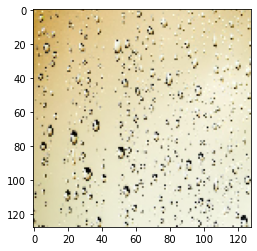

In [114]:
plt.imshow(img_rain)

In [116]:
img_rain=img_rain.reshape(1,128,128,3)

In [117]:
img_rain.shape

(1, 128, 128, 3)

In [118]:
np.argmax(mod.predict(img_rain))

1